    ВВЕДЕНИЕ В DATA SCIENCE. Щавровская Полина

Подключаем

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 100% !important; height: 100% !important;} </style>" 

In [55]:
titanic = pd.read_csv("C:\\учеба\\Программирование\\DtaScience Stepik\\ТИТАНИК\\Titanic.csv")

In [56]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [58]:
titanic['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [59]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
titanic = titanic.drop(['PassengerId', 'Cabin'], axis = 1)

Общие статистики и проверка данных на пропуски

In [61]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [62]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

Визуализация распределения выживаемости

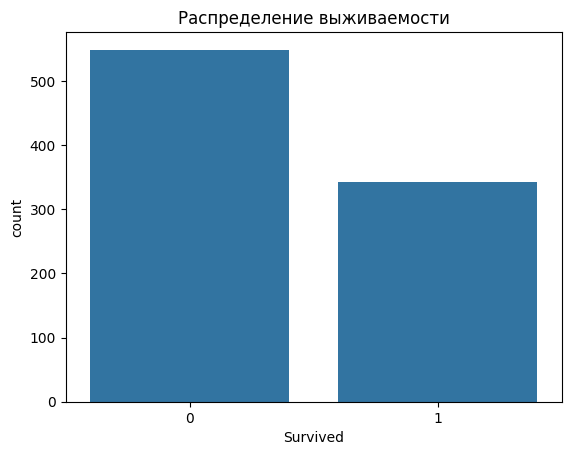

In [64]:
# Создаем столбчатый график, чтобы визуализировать количество выживших и не выживших
sns.countplot(x='Survived', data=titanic)
# Устанавливаем заголовок графика
plt.title('Распределение выживаемости')
# Отображаем график
plt.show()


Сравнение выживаемости по полу

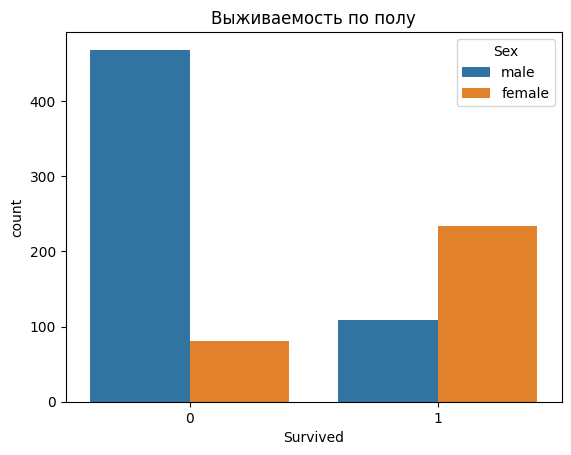

In [65]:
# Создаем столбчатый график, чтобы визуализировать количество выживших и не выживших, разбитое по полу
sns.countplot(x='Survived', hue='Sex', data=titanic)
# Устанавливаем заголовок графика
plt.title('Выживаемость по полу')
# Отображаем график
plt.show()


Сравнение выживаемости по классу

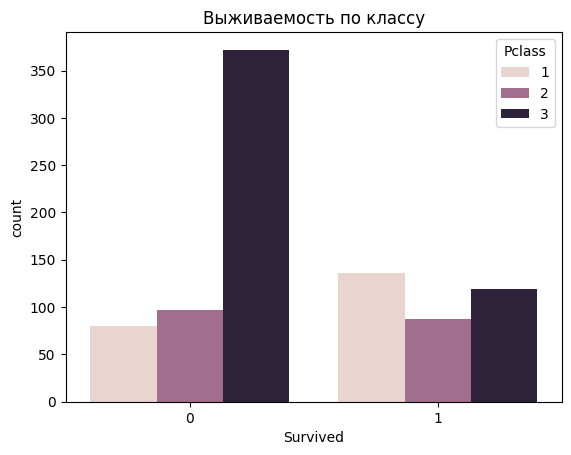

In [66]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)
plt.title('Выживаемость по классу')
plt.show()

Сравнение выживаемости по возрасту

боксплот отображает возраст пассажиров (по оси Y) в зависимости от их выживаемости (по оси X). Он показывает, как возраст распределен среди выживших и невыживших пассажиров.

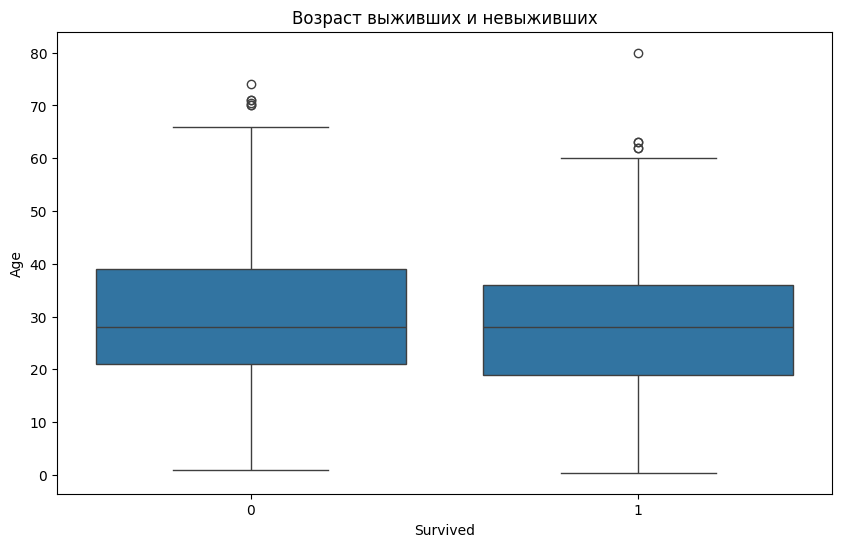

In [15]:
# Создаем новый график с заданными размерами (ширина 10 дюймов, высота 6 дюймов)
plt.figure(figsize=(10, 6))
# Создаем боксплот для визуализации распределения возраста по категориям выживаемости
sns.boxplot(x='Survived', y='Age', data=titanic)
# Устанавливаем заголовок графика
plt.title('Возраст выживших и невыживших')
# Отображаем график
plt.show()

Анализ ролей братьев и сестер в выживаемости

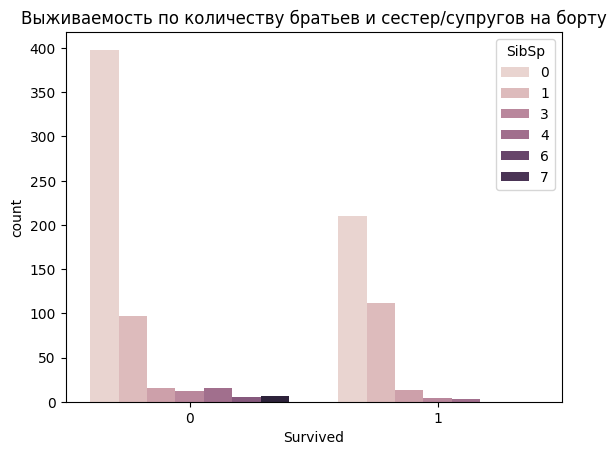

In [16]:
sns.countplot(x='Survived', hue='SibSp', data=titanic)
plt.title('Выживаемость по количеству братьев и сестер/супругов на борту')
plt.show()

Анализ влияния родителей/детей на выживаемость

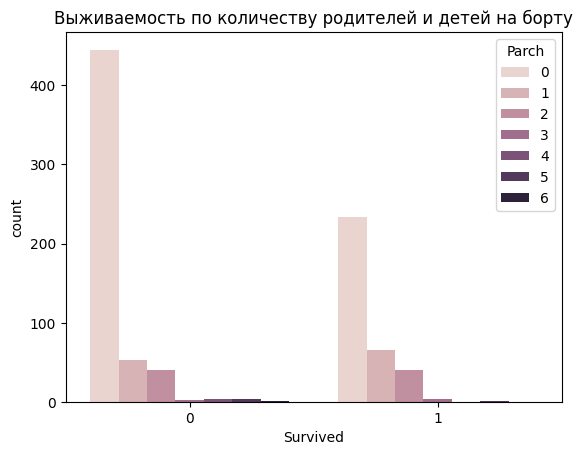

In [17]:
sns.countplot(x='Survived', hue='Parch', data=titanic)
plt.title('Выживаемость по количеству родителей и детей на борту')
plt.show()

 Анализ цен на билеты

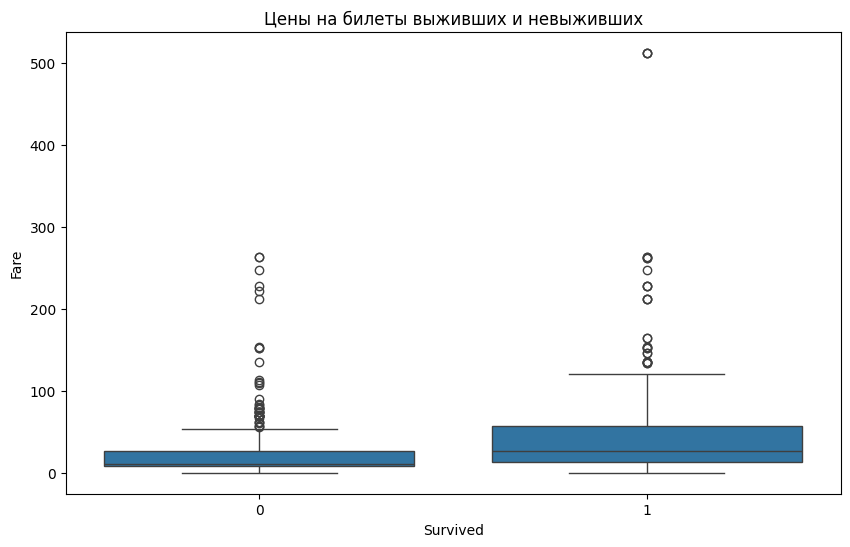

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.title('Цены на билеты выживших и невыживших')
plt.show()

Картограмма выживаемости по портам

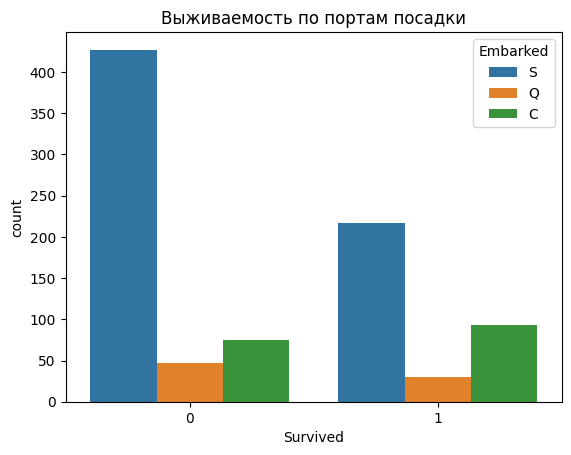

In [19]:
sns.countplot(x='Survived', hue='Embarked', data=titanic)
plt.title('Выживаемость по портам посадки')
plt.show()

    Выводы на основе графиков:
- Пол и класс пассажира существенно влияют на шансы выживания.
- Молодые женщины часто имели высокие шансы выжить.
- Количество братьев и сестер/супругов также может влиять на выживаемость.

    Feature Engineering

In [69]:
# Проверьте, как называется столбец, и исправьте код
# Например, если он называется 'sex', замените 'Sex' на 'sex'

# Создание новой колонки 'Is_Female'
titanic['Is_Female'] = titanic['Sex'].apply(lambda x: 1 if x == 'female' else 0)

# Объединяем количество братьев и сестер (SibSp) и родителей/детей (Parch) 
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch']

# Нормализуем возраст: заполняем пропуски медианным значением
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Создаем новый признак 'Age_Group' для анализа
titanic['Age_Group'] = pd.cut(titanic['Age'], bins=[0, 12, 18, 30, 50, 80], labels=[0, 1, 2, 3, 4])

# Убираем ненужные колонки
data = titanic.drop(columns=['Name', 'Ticket', 'Sex', 'Age'])

data = pd.get_dummies(data, drop_first=True)

# Рассчитываем корреляцию
correlation_matrix = data.corr()
print(correlation_matrix)




             Survived    Pclass     SibSp     Parch      Fare  Is_Female  \
Survived     1.000000 -0.338481 -0.035322  0.081629  0.257307   0.543351   
Pclass      -0.338481  1.000000  0.083081  0.018443 -0.549500  -0.131900   
SibSp       -0.035322  0.083081  1.000000  0.414838  0.159651   0.114631   
Parch        0.081629  0.018443  0.414838  1.000000  0.216225   0.245489   
Fare         0.257307 -0.549500  0.159651  0.216225  1.000000   0.182333   
Is_Female    0.543351 -0.131900  0.114631  0.245489  0.182333   1.000000   
Family_Size  0.016639  0.065997  0.890712  0.783111  0.217138   0.200988   
Embarked_Q   0.003650  0.221009 -0.026354 -0.081228 -0.117216   0.074115   
Embarked_S  -0.155660  0.081720  0.070941  0.063036 -0.166603  -0.125722   
Age_Group_1  0.026859  0.061877  0.035538  0.032561  0.007332   0.098941   
Age_Group_2 -0.108818  0.217690 -0.099359 -0.216142 -0.141760  -0.068266   
Age_Group_3  0.049329 -0.203744 -0.082632  0.018930  0.120349   0.005651   
Age_Group_4 

Для большей наглядности визуализируем корреляцию


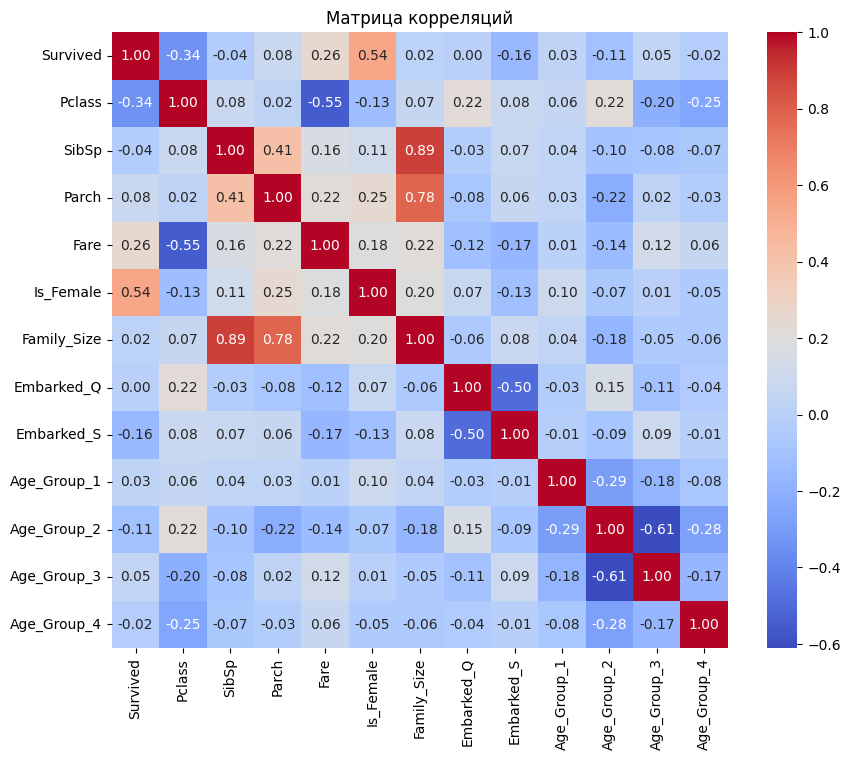

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляций')
plt.show()


1. Survived и Is_Female:
   - Корреляция: 0.543. Это довольно высокая положительная корреляция, указывающая на то, что женщины имели значительно более высокие шансы на выживание по сравнению с мужчинами.

2. Survived и Pclass:
   - Корреляция: -0.338. Это отрицательная корреляция, которая подразумевает, что пассажиры более низких классов (например, 3-й класс) имели меньшие шансы на выживание. Это соответствует историческим данным о том, что более богатые пассажиры чаще получали доступ к спасательным шлюпкам.

3. Survived и Fare:
   - Корреляция: 0.257. Существует положительная связь между ценой билета и выживанием. Это может указывать, что пассажиры, заплатившие больше, могли находиться на более высоких палубах и имели лучшие условия для эвакуации.

4. Survived и Family_Size:
   - Корреляция: 0.017. Здесь почти нет корреляции, что может указывать на то, что наличие членов семьи не оказало значительного влияния на шансы на выживание, хотя стоит отметить положительную связь с Parch (0.414), что показывает, что члены семьи могли путешествовать вместе.

6. Embarked_Q и Embarked_S:
   - Корреляция: 0.497. Это означает, что существует обратная связь между двумя портами отправления, что предполагает, что пассажиры не ожидали, что оба порта отправления будут одновременно заполнены.

7. Age_Group и Survived:
   - можно заметить Age_Group_2 с коэффициентом -0.109 и Age_Group_4 с -0.023, что может указывать на то, что средний возраст пассажиров не оказывает значительного влияния на выживание, хотя для младших возрастных групп можно ожидать положительного результата.

Заключение:
Эта корреляционная матрица показывает, что пол и класс являются ключевыми факторами, влияющими на вероятность выживания. Женщины и пассажиры более высоких классов имели значительно большие шансы на спасение. Ценовая категория билета также вносит свой вклад в шансы на выживание. В то же время, размер семьи, хотя и показывает некоторую корреляцию с родительскими и детскими отношениями, не оказывает столь значительного влияния, как пол и класс. 

    Модель

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [457]:
# Создание искусственного набора данных
X, y = make_classification(n_samples=400, n_features=20, n_classes=2, random_state=42)

# Разделение данных на обучающую и тестовую выборки
# 80% данных для обучения, 20% для тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
# Стандартизируем признаки для улучшения сходимости модели
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
# Добавляем полносвязный слой с 64 нейронами и функцией активации ReLU
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# Добавляем слой Dropout для регуляризации модели, вероятность отключения 50%
model.add(Dropout(0.5))
# Добавляем еще один полносвязный слой с 32 нейронами и функцией активации ReLU
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
# Выходной слой с 1 нейроном и функцией активации Sigmoid для бинарной классификации
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
# Используем оптимизатор Adam, функцию потерь binary_crossentropy и метрику точности
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
# Увеличиваем количество эпох до 50 для лучшей сходимости
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10


c:\Users\shcha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5585 - loss: 0.7390 - val_accuracy: 0.5625 - val_loss: 0.6628
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5757 - loss: 0.7182 - val_accuracy: 0.6719 - val_loss: 0.6274
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6458 - loss: 0.6469 - val_accuracy: 0.7344 - val_loss: 0.5968
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6632 - loss: 0.6275 - val_accuracy: 0.7812 - val_loss: 0.5702
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6568 - loss: 0.6028 - val_accuracy: 0.8125 - val_loss: 0.5455
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7069 - loss: 0.5657 - val_accuracy: 0.7969 - val_loss: 0.5233
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7484 - loss: 0.5014 - val_accuracy: 0.7969 - val_loss: 0.5029
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7759 - loss: 0.4735 - val_accuracy: 0.8125 - val_loss: 0.4846
Epoch 9/10
8/8 ━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8391 - loss: 0.4090
Test Accuracy: 0.85


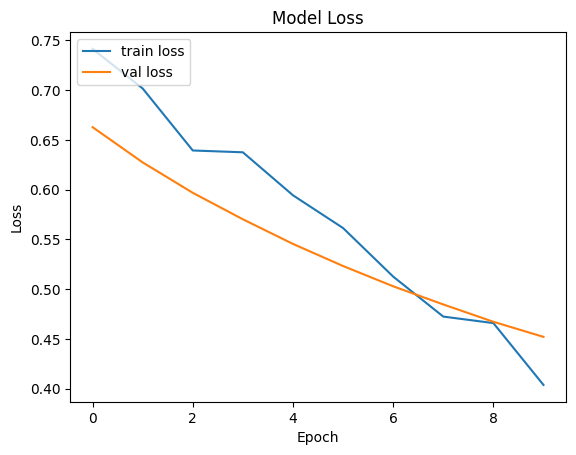

['fully-connected-model.pkl']

In [458]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Сохранение модели
import joblib
joblib.dump(model, 'fully-connected-model.pkl')

Кроссвалидация

c:\Users\shcha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


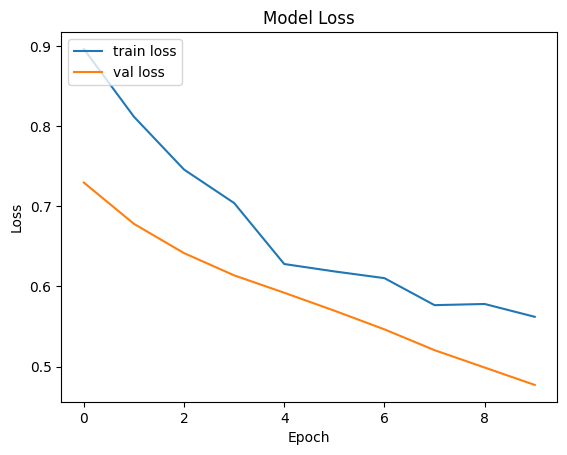

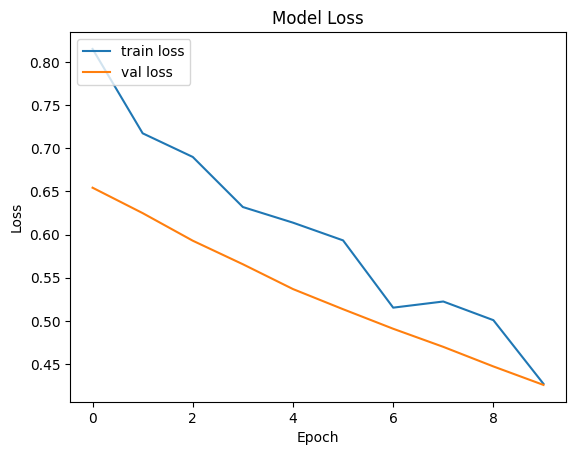

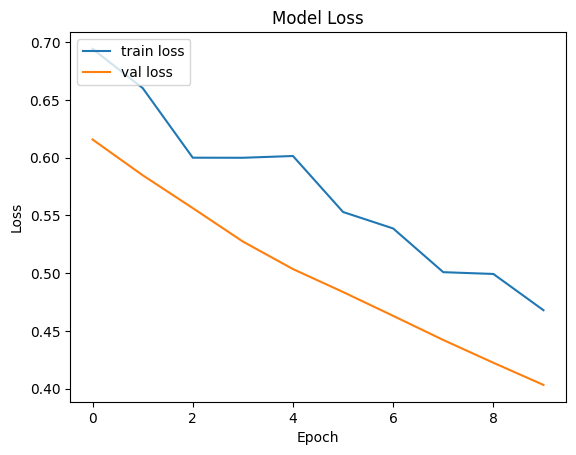

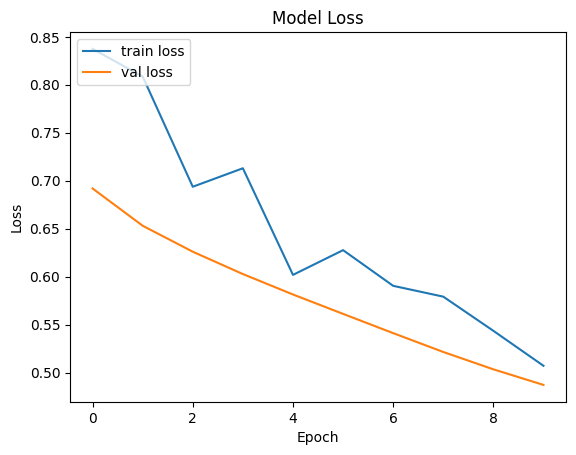

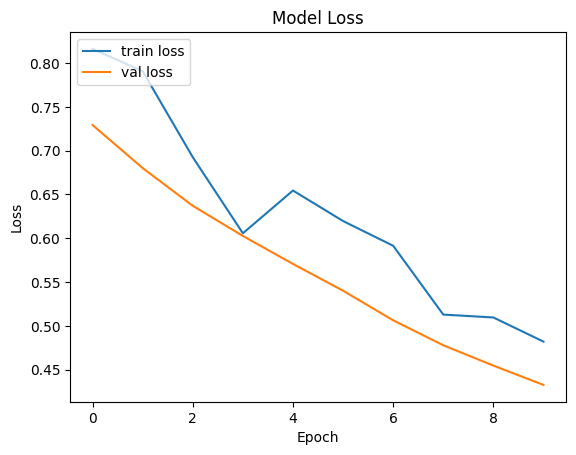

Средняя точность модели: 0.86 ± 0.05


In [79]:
from sklearn.model_selection import train_test_split, KFold

# Создание искусственного набора данных
X, y = make_classification(n_samples=400, n_features=20, n_classes=2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Нормализуем весь набор данных сразу для улучшения сходимости модели

# Инициализация KFold для кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Список для хранения точностей модели на каждом фолде
accuracies = []

# Цикл по каждому фолду
for train_index, test_index in kf.split(X):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Создание модели нейронной сети
    model = Sequential()
    # Добавляем полносвязный слой с 64 нейронами и функцией активации ReLU
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    # Добавляем слой Dropout для регуляризации модели, вероятность отключения 50%
    model.add(Dropout(0.5))
    # Добавляем еще один полносвязный слой с 32 нейронами и функцией активации ReLU
    model.add(Dense(32, activation='relu'))
    # Добавляем еще один слой Dropout для дальнейшей регуляризации
    model.add(Dropout(0.5))
    # Выходной слой с 1 нейроном и функцией активации Sigmoid для бинарной классификации
    model.add(Dense(1, activation='sigmoid'))

    # Компиляция модели с оптимизатором Adam и функцией потерь binary_crossentropy
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Обучение модели на обучающей выборке
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Оценка модели на тестовой выборке и сохранение точности
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

    # Визуализация потерь (опционально, если вы хотите видеть процесс обучения)
    plt.plot(history.history['loss'], label='train loss')  # График потерь на обучающей выборке
    plt.plot(history.history['val_loss'], label='val loss')  # График потерь на валидационной выборке
    plt.title('Model Loss')  # Заголовок графика
    plt.ylabel('Loss')  # Подпись оси Y
    plt.xlabel('Epoch')  # Подпись оси X
    plt.legend(loc='upper left')  # Легенда графика
    plt.show()  # Отображение графика

# Вывод результатов кросс-валидации: средняя точность и стандартное отклонение
print(f'Средняя точность модели: {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}')
